<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/atividade_metodos_sobreclassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Métodos de Sobreclassificação

---


## Inportando bibliotecas

In [1]:
!pip install pyDecision -q

     |████████████████████████████████| 65 kB 3.3 MB/s 


In [2]:
import numpy as np
import pandas as pd
from pyDecision.algorithm import electre_iii

## Importando Dados

Este problema é referente a aplicação práticas de um problema multicritério para tomada de decisão, tal problema tem como objetivo a compra de um novo notebook de alto desempenho para trabalho de visão computacional.

De forma geral, a busca de tais alternativas foram feitas em sites brasileiros e levando em consideração algumas premissas, sendo elas:

*  Notebooks de alto desempenho com de processador i7;
*  Notebooks das marcas Asus, Avell e Dell, com suporte de no mínimo 1 ano;
*  Slot para HD adicional para a máquina;
*  Preço referente a aquisição sem desconto.

Os critérios escolhidos para tal aquisição foram:

*   Memória RAM (GB)
*   Armazenamento (Tb)
*   Placa de Vídeo (GB)
*   Processador (Hz)
*   Preço (R$)



In [27]:
ds = pd.read_excel("/content/dados.xlsx", 0)
ds_list = np.array(ds.iloc[:,2:])
#print(f"DADOS: \n {ds_list} \n")

In [28]:
ds

,Alternativas,Notebook,RAM (GB),Armazenamento (GB),Placa de Vídeo (GB),Processador i7 (HZ),Preço (R$)
0,a1,AVELL C62 MOB,8,250,4,2.3,7773
1,a2,Avell A70 HYB,8,250,4,2.3,9138
2,a3,AVELL A70 MOB,32,500,4,2.3,9264
3,a4,AVELL A65 MOB,16,500,6,2.3,15444
4,a5,ASUS M515,8,256,2,3.7,4099
5,a6,Novo Notebook Inspiron 15 3000,8,256,4,2.8,5399
6,a7,Notebook Vostro 3510,8,256,4,2.8,5528
7,a8,Novo Notebook Inspiron 15 3000,8,256,4,2.8,5649
8,a9,Notebook Inspiron 15,8,512,4,3.4,5799
9,a10,Notebook Vostro 5510,16,256,4,3.4,7129


### Electre III

Foi escolho o método do Electre III, pois o intuito era realizar um ranking dos melhores notebooks, com base em pseudos critérios, levando em consideração os pesos para cada critério estabelecido. Esse método ainda tem a vantagem das relações de discordância e concordância serem estabelecidos pelo decisor (comprador final no nosso caso) e ainda revelam o grau de rigor dessas relações.

Os pesos e limiares de concordância (p), discordância(q), veto (v) e os pesos (w) foram geradas através de discussões com o usuário final, com o intuito de satisfazer os interesses deste.


In [29]:
ds_pesos = pd.read_excel("/content/dados.xlsx", 1)
W = np.array(ds_pesos.iloc[ 0: 1,1:])[0].tolist()
Q = np.array(ds_pesos.iloc[ 1: 2,1:])[0].tolist()
P = np.array(ds_pesos.iloc[-2:-1,1:])[0].tolist()
V = np.array(ds_pesos.iloc[-1:  ,1:])[0].tolist()

print(f"w: \n {W}")
print(f"q: \n {Q}")
print(f"p: \n {P}")
print(f"v: \n {V}")

w: 
 [2.7, 1.0, 4.0, 3.5, 2.5]
q: 
 [2.0, 150.0, 1.0, 1.5, 500.0]
p: 
 [4.0, 200.0, 2.0, 2.5, 750.0]
v: 
 [8.0, 400.0, 3.0, 3.0, 1500.0]


#### Encontrando a solução

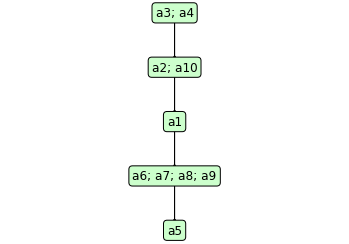

In [30]:
global_concordance, credibility, rank_D, rank_A, rank_N, rank_P = electre_iii(ds_list, P = P, Q = Q, V = V, W = W, graph = True)

In [31]:
global_concordance

array([[1.        , 0.81751825, 0.54744526, 0.25547445, 1.        ,
        1.        , 1.        , 1.        , 0.9270073 , 0.80291971],
       [1.        , 1.        , 0.72992701, 0.25547445, 1.        ,
        1.        , 1.        , 1.        , 0.9270073 , 0.80291971],
       [1.        , 1.        , 1.        , 0.52554745, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.80291971, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.52554745, 0.52554745, 0.25547445, 0.25547445, 1.        ,
        0.52554745, 0.52554745, 0.52554745, 0.45255474, 0.32846715],
       [0.81751825, 0.81751825, 0.54744526, 0.25547445, 1.        ,
        1.        , 1.        , 1.        , 0.9270073 , 0.62043796],
       [0.81751825, 0.81751825, 0.54744526, 0.25547445, 1.        ,
        1.        , 1.        , 1.        , 0.9270073 , 0.62043796],
       [0.81751825, 0.81751825, 0.5474452

In [32]:
credibility

array([[0.        , 0.8064    , 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 0.9270073 , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 0.9270073 , 0.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29538462, 0.10486154, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.9270073 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.9270073 , 0.        ],
       [0.        , 0.        , 0.       

#### Gerando Resultado Final

In [131]:
rank_D_final = []
rank = []
k = 1
for i in range(0, len(rank_D)):
    splited = list(rank_D[i].split('; '))
    for s in splited:
        rank_D_final.append(s)
        rank.append(k)
    k += 1

resultado = pd.DataFrame()
resultado["Alternativas"] = rank_D_final
resultado["Resultado"] = rank

In [132]:
dic = ds.iloc[:, 0:2].set_index("Alternativas")
dic.join(resultado.set_index("Alternativas"), on = "Alternativas").sort_values("Resultado")

,Notebook,Resultado
Alternativas,,
a3,AVELL A70 MOB,1
a4,AVELL A65 MOB,1
a2,Avell A70 HYB,2
a10,Notebook Vostro 5510,2
a1,AVELL C62 MOB,3
a6,Novo Notebook Inspiron 15 3000,4
a7,Notebook Vostro 3510,4
a8,Novo Notebook Inspiron 15 3000,4
a9,Notebook Inspiron 15,4
